### This notebook will be an overview of Linear Regression, one of the most important concepts any data scientist needs to know.

**Author: Andrew Berry**

* We will be using the boston housing dataset to understand linear regression. For more information click [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* We will cover how to use linear regression with python, and how it is used in a datascience workflow

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Dataset
from sklearn.datasets import load_boston

#### Data Dictionary

|Feature|Description|
|---|---|
|CRIM|per captia crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town.|
|CHAS |Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX |nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to five Boston employment centres|
|RAD|index of accessibility to radial highways|
|TAX|full-value property-tax rate per 10,000 dollars|
|PTRATIO| pupil-teacher ration by town|
|B|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT|percent lower status of the population|
|**MEDV - aka. target**|Median value of owner-occupied homes in $1000's|

In [4]:
#Loading the boston dataset from the sklearn dataset library
data = load_boston()

df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
#our target
y = data.target

### The Basics

Let's imagine we only had one feature available to us to predict the median housing price. That feature would be the average number of rooms per dwelling. 

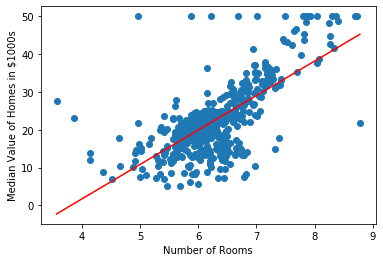

In [19]:
plt.figure()
plt.scatter(df.RM, y)
#Line of best fit
plt.plot(np.unique(df.RM), np.poly1d(np.polyfit(df.RM, y, 1))(np.unique(df.RM)), color ='red')

plt.xlabel('Number of Rooms')
plt.ylabel('Median Value of Homes in $1000s')
plt.show()

We can see that there is a positve relationship between number of rooms and value of homes. The more rooms you have in the house, the higher the value of your own home. This can be confirmed with the line of best fit on the plot.

We can also look at the correlation coeficient to see how strong the relationship is between the two features. 

In [43]:
np.corrcoef(df.RM,y)

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

**In Essense a Linear Regression model, tries to find the line of best fit through all the features in order to best predict the target value.** 

However, there are some assumptions the linear regression model makes that you need to be aware of.

(i) linearity and additivity of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b) The slope of that line does not depend on the values of the other variables.

    (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

(ii) statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

(iii) homoscedasticity (constant variance) of the errors

    (a) versus time (in the case of time series data)

    (b) versus the predictions

    (c) versus any independent variable

(iv) normality of the error distribution. 


For more information click here: http://people.duke.edu/~rnau/testing.htm

## SKLEARN 

In [25]:
#Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#Metrics
from sklearn.metrics import mean_squared_error as mse

#Scaler
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)

In [35]:
#Intatiate Lin Reg
lin_reg = LinearRegression()

#fit
lin_reg.fit(df_scaled, y)

#pred
predictions = lin_reg.predict(df_scaled)

#Evaluate
MSE = mse(y,predictions)

In [36]:
RMSE = np.sqrt(MSE)
print(RMSE)

4.679191295697281


In [37]:
#SGDregressor is a sklearn's lin reg model with gradietn descent

lin_reg_sgd = SGDRegressor(tol=0.0001, eta0 =0.01)

lin_reg_sgd.fit(df_scaled, y)


pred_sgd = lin_reg_sgd.predict(df_scaled)


#evaluate
MSE_sgd = mse(y,pred_sgd)

In [38]:
RMSE_sgd = np.sqrt(MSE_sgd)
print(RMSE_sgd)

4.686829348475966


## Stats Model

In [44]:
from statsmodel.regression import linear_model
import statsmodel.api as sm

ModuleNotFoundError: No module named 'statsmodel'

In [45]:
# will do that bit later

#### Pro Tip: If you have a feature that is categorical, it's best to convert them to dummy vaiables when feeding it to the linear regression odel. 

## Interpreting your model and how to improve it

In [39]:
# Lets look at the coeficcients

In [42]:
sorted(list(zip(df.columns,lin_reg.coef_)), key = lambda x: abs(x[1]))

[('AGE', 0.01946607165704488),
 ('INDUS', 0.14089999690428306),
 ('CHAS', 0.6817397247777968),
 ('B', 0.8492684177053306),
 ('CRIM', -0.9281460643012006),
 ('ZN', 1.0815686278223722),
 ('NOX', -2.05671826600522),
 ('PTRATIO', -2.0606066589067615),
 ('TAX', -2.0767816838433775),
 ('RAD', 2.662217642473626),
 ('RM', 2.6742301652393214),
 ('DIS', -3.1040442580864447),
 ('LSTAT', -3.7436271264671097)]

The Coefficents represent the average change in housing price for one unit of change in the feature, while hodling other features in the model constant. 

Example, holding all features constant, unit incrase in RM will increase our target value by 2.674